# **Proyek Predictive Analytics: [Energy Consumption Prediction]**
*   Nama: Sandy Sanjaya
*   Email: sandyysanjayaa@upi.edu
*   ID Dicoding: Sandy Sanjaya

# **Import Library**

Mengimpor library yang dibutuhkan untuk manipulasi data, visualisasi, dan pemodelan machine learning


In [ ]:
# Melakukan import library
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import datetime

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression , Ridge , Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler, LabelEncoder , OneHotEncoder

from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score , mean_absolute_error

from plotly.subplots import make_subplots
import plotly.graph_objects as go

import warnings
warnings.filterwarnings("ignore")

# **Load Dataset**

Melakukan load data set energy consumption

In [ ]:
# Load Dataset
dataset_path = 'Energy_consumption_dataset.csv'
df = pd.read_csv(dataset_path)

# Tampilkan 5 baris pertama
df.head()

,Month,Hour,DayOfWeek,Holiday,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,EnergyConsumption
0,1,0,Saturday,No,25.139433,43.431581,1565.693999,5,On,Off,2.774699,75.364373
1,1,1,Saturday,No,27.731651,54.225919,1411.064918,1,On,On,21.831384,83.401855
2,1,2,Saturday,No,28.704277,58.907658,1755.715009,2,Off,Off,6.764672,78.270888
3,1,3,Saturday,No,20.080469,50.371637,1452.316318,1,Off,On,8.623447,56.519850
4,1,4,Saturday,No,23.097359,51.401421,1094.130359,9,On,Off,3.071969,70.811732


# **Deskripsi Data**
Month : Menunjukkan bulan dalam setahun (1–12). Berguna untuk mengelompokkan data berdasarkan musim.

Hour : Menunjukkan waktu dalam satu hari (0–23). Dapat digunakan untuk mengelompokkan waktu menjadi pagi, siang, sore, dan malam.

DayOfWeek : Variabel kategorikal yang menunjukkan hari dalam satu minggu.

Holiday : Variabel kategorikal bertipe boolean yang menunjukkan apakah hari tersebut merupakan hari libur atau bukan.

Temperature : Variabel numerik yang menunjukkan suhu dalam derajat Celcius.

Humidity : Variabel numerik yang menunjukkan tingkat kelembapan dalam persen.

SquareFootage : Variabel numerik yang mengukur luas bangunan atau ruangan (dalam satuan kaki persegi).

Occupancy : Variabel numerik yang menunjukkan jumlah orang yang berada di area tersebut.

HVACUsage : Variabel kategorikal yang menunjukkan penggunaan sistem pemanas, ventilasi, dan pendingin udara (HVAC).

LightingUsage : Variabel kategorikal yang menunjukkan penggunaan sistem pencahayaan.

RenewableEnergy : Variabel numerik yang menunjukkan persentase kontribusi dari sumber energi terbarukan.

EnergyConsumption : Variabel target numerik yang menunjukkan total energi yang dikonsumsi.

# **Exploratory Data Analysis (EDA)**

Menampilkan informasi umum tentang dataset seperti jumlah entri, kolom, tipe data, dan nilai non-null pada tiap kolom


In [ ]:
# Menampilkan informasi umum tentang dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Month              5000 non-null   int64  
 1   Hour               5000 non-null   int64  
 2   DayOfWeek          5000 non-null   object 
 3   Holiday            5000 non-null   object 
 4   Temperature        5000 non-null   float64
 5   Humidity           5000 non-null   float64
 6   SquareFootage      5000 non-null   float64
 7   Occupancy          5000 non-null   int64  
 8   HVACUsage          5000 non-null   object 
 9   LightingUsage      5000 non-null   object 
 10  RenewableEnergy    5000 non-null   float64
 11  EnergyConsumption  5000 non-null   float64
dtypes: float64(5), int64(3), object(4)
memory usage: 468.9+ KB


Menampilkan statistik deskriptif seperti mean, median, standar deviasi, nilai minimum dan maksimum untuk kolom numerik

In [ ]:
# Menampilkan statistik deskriptif
df.describe()

,Month,Hour,Temperature,Humidity,SquareFootage,Occupancy,RenewableEnergy,EnergyConsumption
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,6.251200,11.556000,24.946823,45.478146,1507.403201,4.576000,15.201195,76.794919
std,3.588687,6.888306,3.041678,8.972690,293.147209,2.906185,9.157038,9.231573
min,1.000000,0.000000,20.007565,30.015975,1000.512661,0.000000,0.006642,53.263278
25%,3.000000,6.000000,22.453790,38.111104,1253.906598,2.000000,7.477928,70.419588
50%,6.000000,11.000000,24.831846,45.793124,1513.581105,5.000000,15.343830,76.696267
75%,9.000000,18.000000,27.427281,52.696651,1754.846457,7.000000,22.889997,83.246274
max,12.000000,23.000000,29.998671,59.969085,1999.982252,9.000000,29.965327,99.201120


Cek apakah terdapat data yang kosong pada masing-masing fitur

In [ ]:
# Mengecek missing values
missing_values = pd.DataFrame(df.isna().sum().reset_index(name='Jumlah Missing'))
missing_values.columns = ['Kolom', 'Jumlah Missing']
missing_values

,Kolom,Jumlah Missing
0,Month,0
1,Hour,0
2,DayOfWeek,0
3,Holiday,0
4,Temperature,0
5,Humidity,0
6,SquareFootage,0
7,Occupancy,0
8,HVACUsage,0
9,LightingUsage,0


Cek apakah terdapat data yang duplikat

In [ ]:
# Mengecek data duplikat
df.duplicated().sum()

np.int64(0)

Cek apakah terdapat data yang mengalami outliers

In [ ]:
# Identifikasi kolom numerik dan kategorikal
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
cat_cols = df.select_dtypes(exclude=['int64', 'float64']).columns

In [ ]:
# Tampilkan kolom numerik dan kategorikal
num_cols, cat_cols

(Index(['Month', 'Hour', 'Temperature', 'Humidity', 'SquareFootage',
        'Occupancy', 'RenewableEnergy', 'EnergyConsumption'],
       dtype='object'),
 Index(['DayOfWeek', 'Holiday', 'HVACUsage', 'LightingUsage'], dtype='object'))

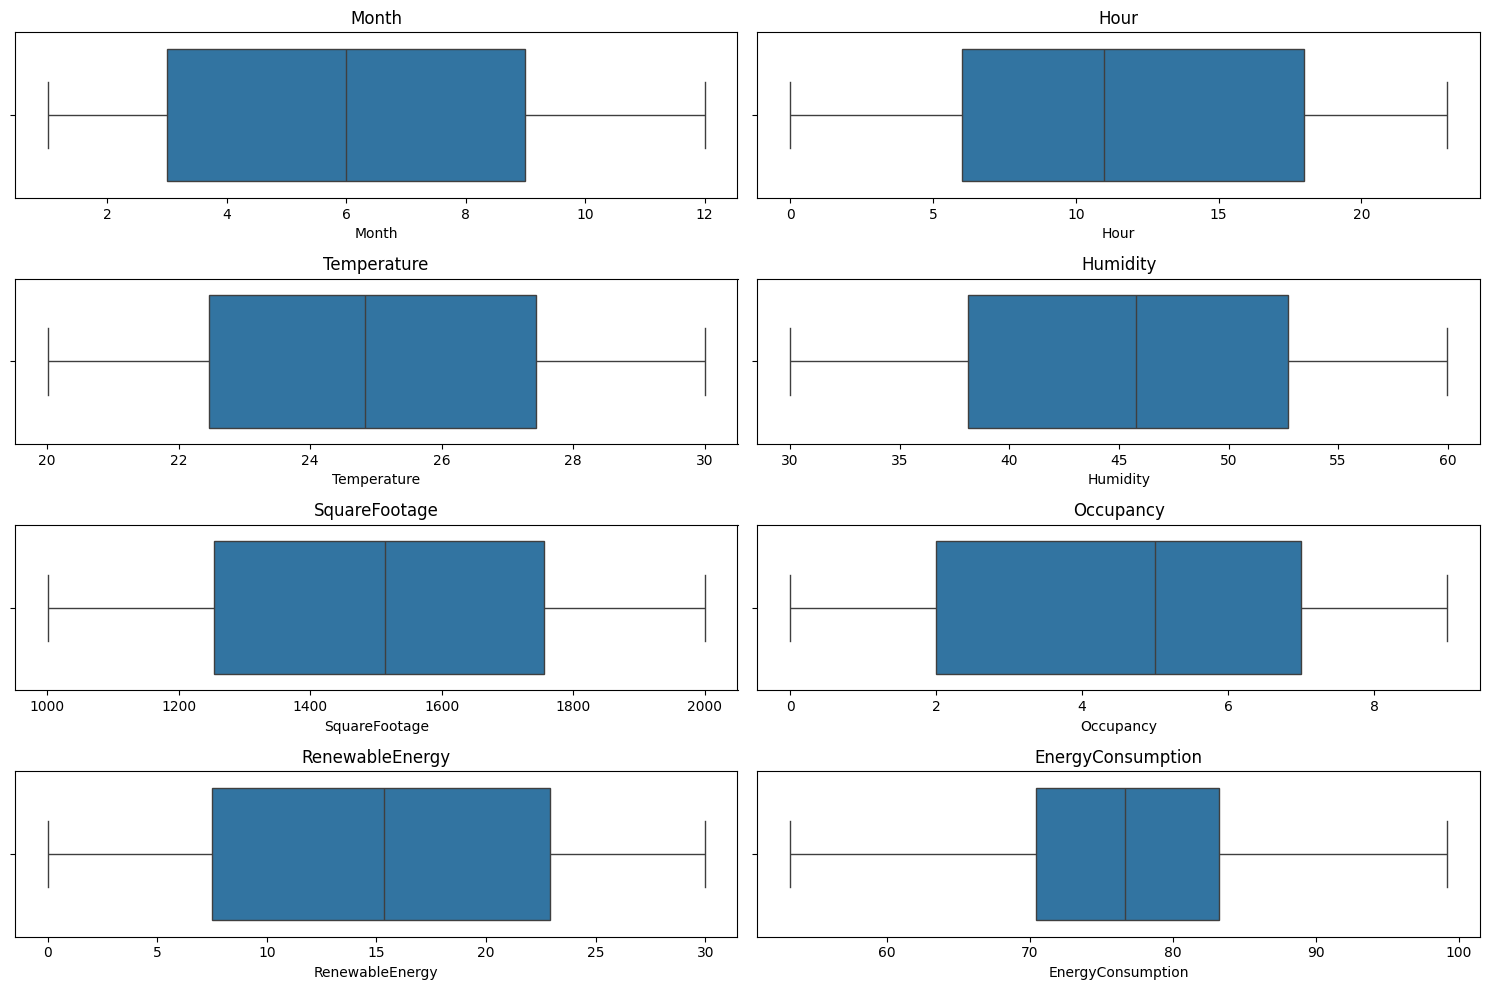

In [ ]:
# Visualisasi outliers dengan boxplot
f, ax = plt.subplots(4, 2, figsize=(15, 10))
ax = ax.flatten()

for index, cols in enumerate(num_cols):
    sns.boxplot(df, x=cols, ax=ax[index])
    ax[index].set_title(cols)

plt.tight_layout()
plt.show()

# **Univariate Analysis**

**Analisis univariat dilakukan untuk memahami karakteristik masing-masing variabel secara individu, seperti distribusi, sebaran, dan nilai ekstrem.**

## **Numerical Features**

Membuat visualisasi distribusi data numerik menggunakan histogram dan kurva KDE untuk memahami pola sebaran tiap fitur

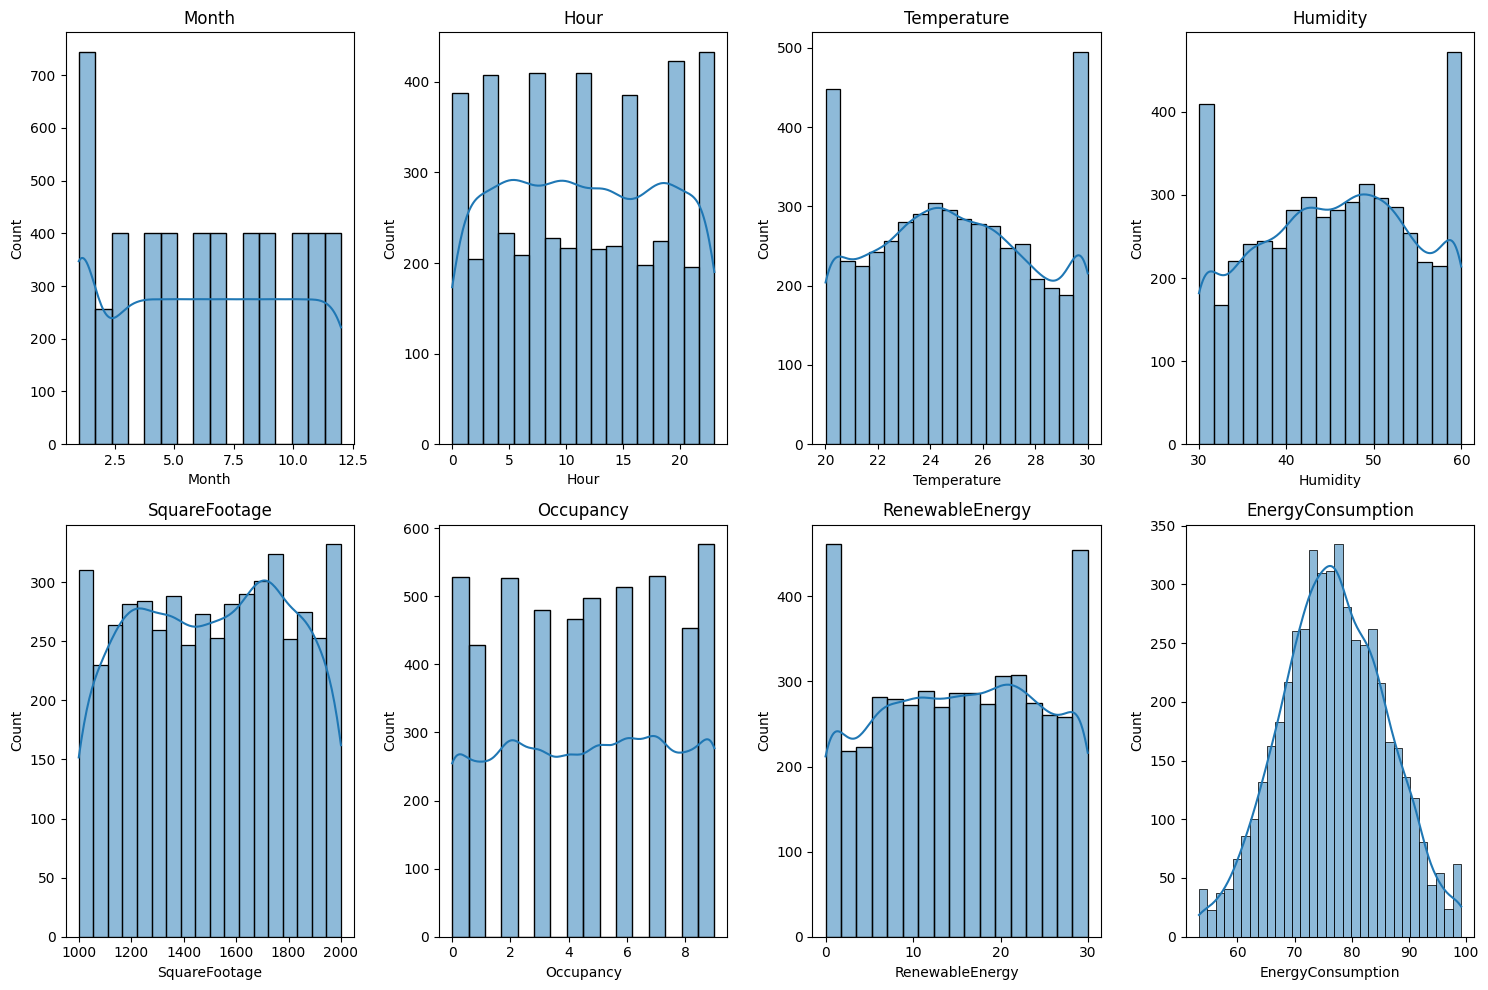

In [ ]:
# Visualisasi distribusi dengan histogram dan KDE
f, ax = plt.subplots(2, 4, figsize=(15, 10))
ax = ax.flatten()

for index, cols in enumerate(num_cols):
    sns.histplot(data=df, x=cols, ax=ax[index], kde=True)
    ax[index].set_title(cols)

plt.tight_layout()
plt.show()

## **Categorical Features**

Membuat visualisasi frekuensi data kategorikal untuk melihat sebaran jumlah tiap kategori dalam masing-masing fitur.

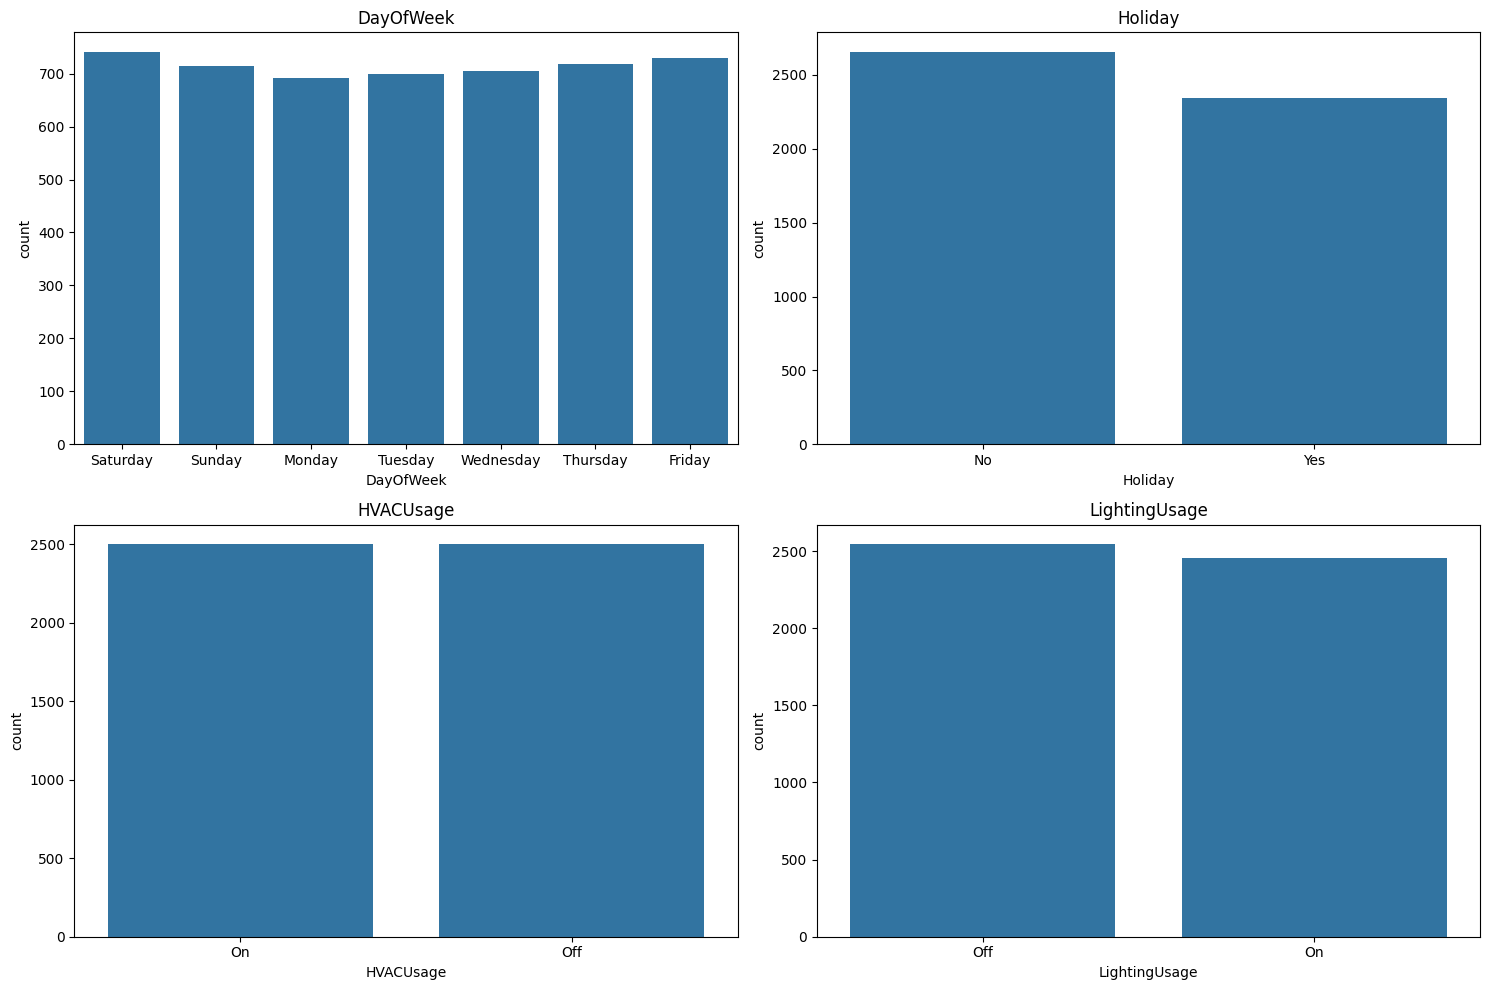

In [ ]:
# Visualisasi distribusi kategori
f, ax = plt.subplots(2, 2, figsize=(15, 10))
ax = ax.flatten()

for index, cols in enumerate(cat_cols):
    sns.countplot(df, x=cols, ax=ax[index])
    ax[index].set_title(cols)

plt.tight_layout()
plt.show()

# **Multivariate Analysis**

**Analisis multivariat dilakukan untuk memahami hubungan atau pola antar dua atau lebih variabel dalam dataset.**

Menampilkan tren rata-rata konsumsi energi bulanan untuk mengamati pola musiman atau fluktuasi sepanjang tahun

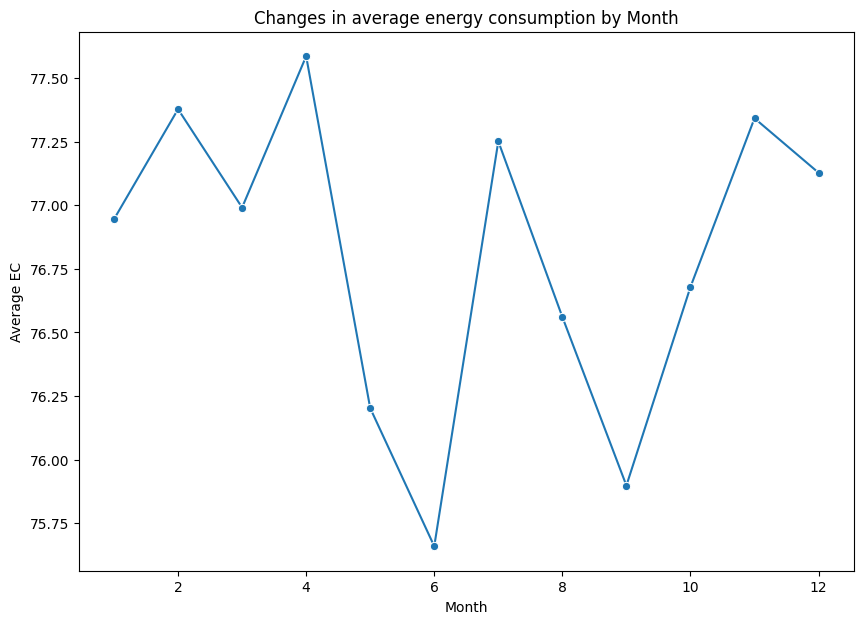

In [ ]:
# Rata-rata konsumsi energi per bulan
mas = df.groupby(['Month'])['EnergyConsumption'].mean().reset_index(name = 'Average EC')

plt.figure(figsize=(10,7))
sns.lineplot(mas, x = 'Month', y= 'Average EC', marker = 'o')
plt.title('Changes in average energy consumption by Month')
plt.show()

Menampilkan rata-rata konsumsi energi per jam untuk mengidentifikasi pola penggunaan energi dalam sehari

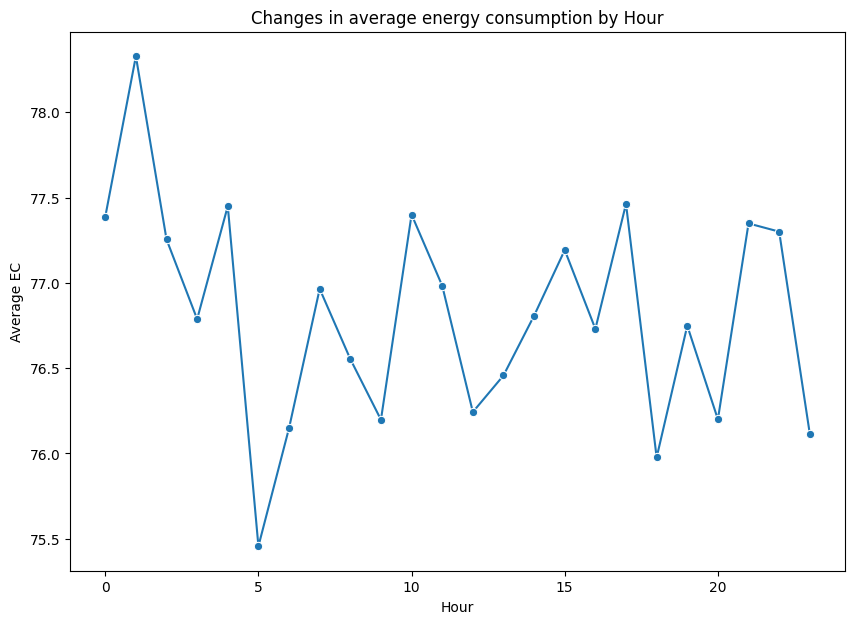

In [ ]:
# Rata-rata konsumsi energi per jam
mhs = df.groupby(['Hour'])['EnergyConsumption'].mean().reset_index(name = 'Average EC')

plt.figure(figsize=(10,7))
sns.lineplot(mhs, x = 'Hour', y= 'Average EC', marker = 'o')
plt.title('Changes in average energy consumption by Hour')
plt.show()

Menampilkan rata-rata konsumsi energi berdasarkan hari dalam seminggu untuk melihat perbedaan pola konsumsi antar hari

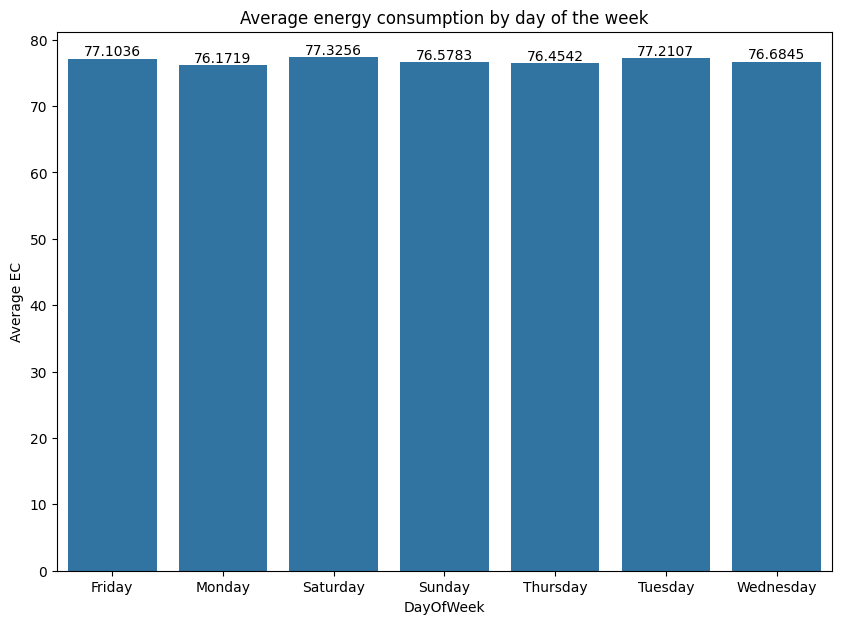

In [ ]:
# Rata-rata konsumsi energi per hari dalam seminggu
dowec = df.groupby(['DayOfWeek'])['EnergyConsumption'].mean().reset_index(name = 'Average EC')

plt.figure(figsize=(10,7))
ax = sns.barplot(data = dowec, x = 'DayOfWeek', y = 'Average EC')
ax.bar_label(ax.containers[0], fontsize=10)
plt.title('Average energy consumption by day of the week')
plt.show()

Menampilkan pairplot untuk mengeksplorasi hubungan antar fitur numerik dan distribusinya

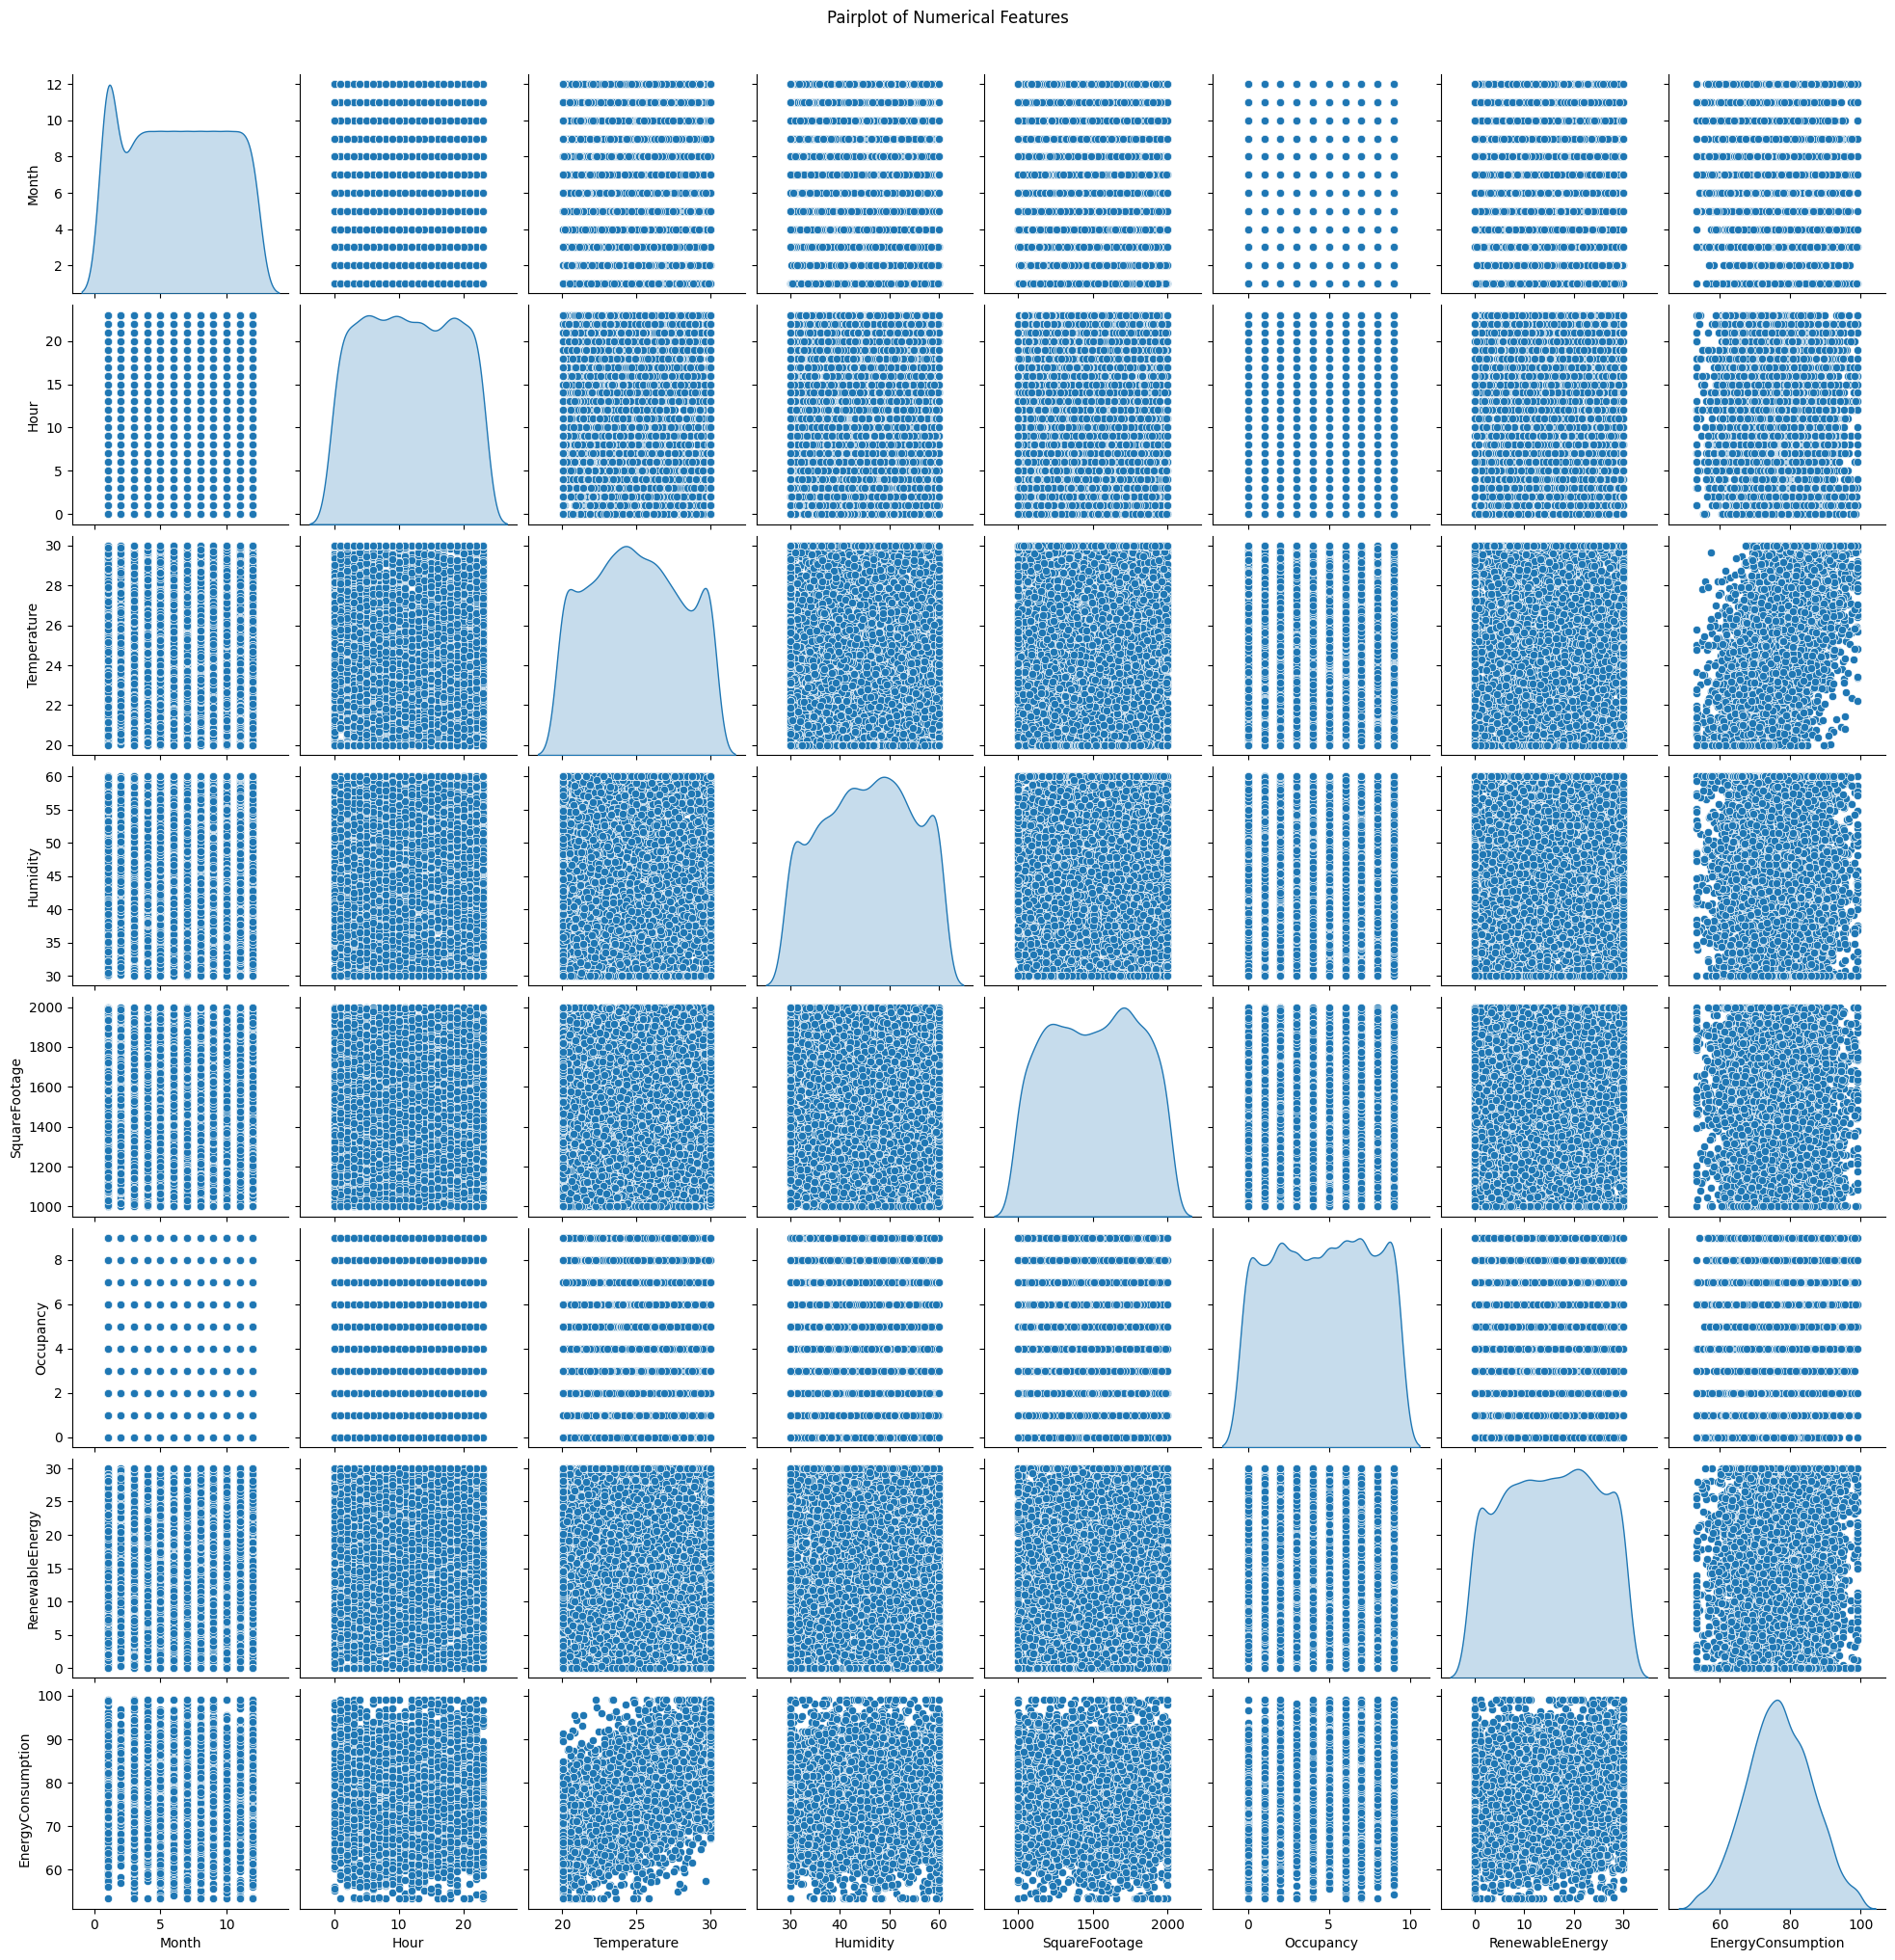

In [ ]:
# Visualisasi hubungan pasangan fitur numerik
sns.pairplot(df[num_cols], diag_kind='kde')
plt.suptitle('Pairplot of Numerical Features', y=1.02)
plt.show()

Menampilkan heatmap korelasi untuk mengidentifikasi hubungan linear antar fitur numerik

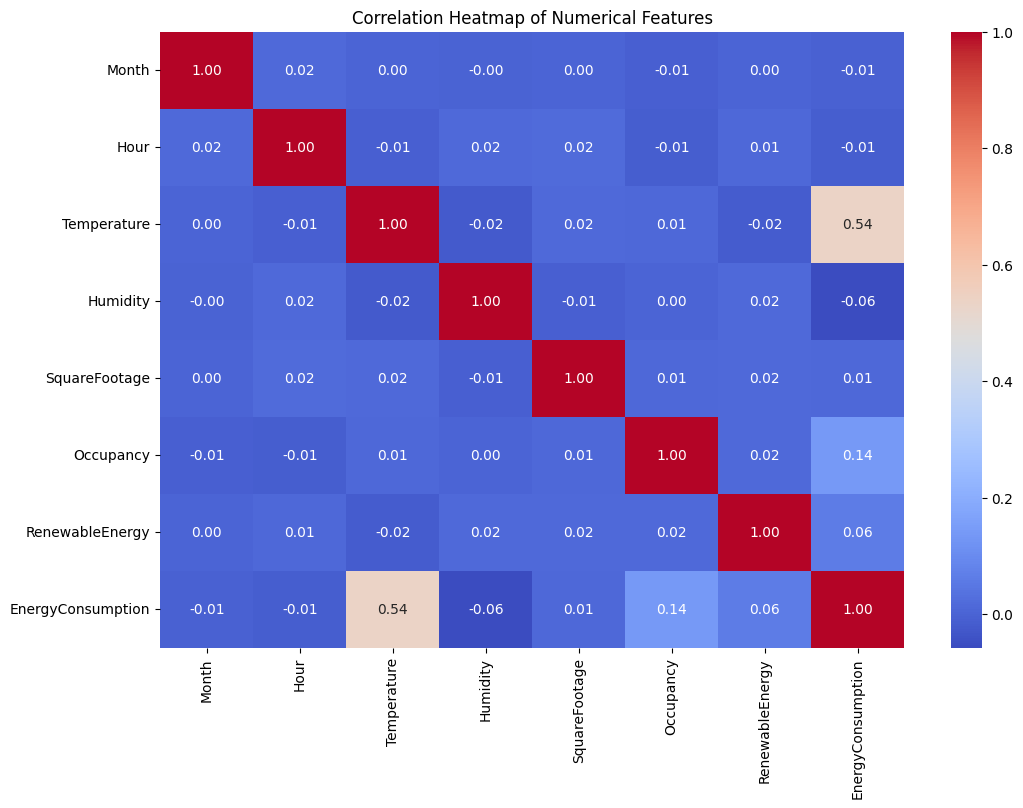

In [ ]:
# Visualisasi melalui correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

# **Data Preparation/Data Preprocessing**

## **Encoding Fitur Kategori**

Melakukan label encoding pada fitur kategorikal untuk mengubah nilai kategori menjadi format numerik

In [ ]:
# Label Encoding fitur kategorikal
label_encoder = LabelEncoder()
for col in cat_cols:
    df[col] = label_encoder.fit_transform(df[col])
df.head()

,Month,Hour,DayOfWeek,Holiday,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,EnergyConsumption
0,1,0,2,0,25.139433,43.431581,1565.693999,5,1,0,2.774699,75.364373
1,1,1,2,0,27.731651,54.225919,1411.064918,1,1,1,21.831384,83.401855
2,1,2,2,0,28.704277,58.907658,1755.715009,2,0,0,6.764672,78.270888
3,1,3,2,0,20.080469,50.371637,1452.316318,1,0,1,8.623447,56.519850
4,1,4,2,0,23.097359,51.401421,1094.130359,9,1,0,3.071969,70.811732


## **Train Test Split**

Memisahkan fitur dan target, lalu membagi data menjadi data latih dan data uji dengan proporsi 80:20

In [ ]:
# Memisahkan fitur (X) dan target (y)
x = df.drop(['EnergyConsumption'], axis=1)
y = df['EnergyConsumption']

# Membagi data menjadi data latih (80%) dan data uji (20%)
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)

In [ ]:
print(f'Total # of sample in whole dataset: {len(x)}')
print(f'Total # of sample in train dataset: {len(x_train)}')
print(f'Total # of sample in test dataset: {len(x_test)}')

Total # of sample in whole dataset: 5000
Total # of sample in train dataset: 4000
Total # of sample in test dataset: 1000


## **Standardisasi**

Melakukan standarisasi fitur numerik pada data latih untuk mengatur skala nilai agar model lebih optimal

In [ ]:
# Identifikasi kolom numerik (kecuali target)
num_features = x.select_dtypes(include=['int64', 'float64']).columns

# Inisialisasi scaler
scaler = StandardScaler()

# Fit dan transform hanya pada training set
x_train[num_features] = scaler.fit_transform(x_train[num_features])

In [ ]:
x_train[num_features].describe().round(4)

,Month,Hour,DayOfWeek,Holiday,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy
count,4000.0000,4000.0000,4000.0000,4000.0000,4000.0000,4000.0000,4000.0000,4000.0000,4000.0000,4000.0000,4000.0000
mean,-0.0000,0.0000,-0.0000,0.0000,-0.0000,-0.0000,0.0000,0.0000,-0.0000,0.0000,0.0000
std,1.0001,1.0001,1.0001,1.0001,1.0001,1.0001,1.0001,1.0001,1.0001,1.0001,1.0001
min,-1.4755,-1.6739,-1.4857,-0.9365,-1.6349,-1.7291,-1.7369,-1.5715,-0.9980,-0.9836,-1.6763
25%,-0.9153,-0.8040,-0.9867,-0.9365,-0.8187,-0.8171,-0.8703,-0.8831,-0.9980,-0.9836,-0.8393
50%,-0.0749,-0.0790,0.0112,-0.9365,-0.0218,0.0311,0.0212,0.1497,-0.9980,-0.9836,0.0164
75%,0.7654,0.9359,1.0092,1.0678,0.8123,0.8021,0.8496,0.8381,1.0020,1.0166,0.8498
max,1.6058,1.6609,1.5081,1.0678,1.6444,1.6182,1.6738,1.5266,1.0020,1.0166,1.6023


# **Model Development**

Menginisialisasi berbagai model regresi untuk dibandingkan performanya dalam prediksi

In [ ]:
# Inisialisasi model-model regresi
rfc = RandomForestRegressor()       # Random Forest Regressor
gbc = GradientBoostingRegressor()   # Gradient Boosting Regressor
lnr = LinearRegression()            # Linear Regression
rid = Ridge(alpha=1.0)              # Ridge Regression dengan alpha 1.0
las = Lasso(alpha=1.0)              # Lasso Regression dengan alpha 1.0
xgb = XGBRegressor()                # XGBoost Regressor

# Gabungkan semua model ke dalam list untuk evaluasi
models = [rfc, gbc, lnr, rid, las, xgb]

# Daftar nama model (untuk keperluan tampilan hasil evaluasi)
names = [
    "Random Forest",
    "Gradient Boosting",
    "Linear Regression",
    "Ridge",
    "Lasso",
    "XGBoost"
]

# **Evaluasi Model**

Mentransformasi fitur numerik pada data uji menggunakan scaler yang sudah di-fit pada data latih untuk menjaga konsistensi skala

In [ ]:
# Transform pada test set menggunakan scaler yang sudah di-fit dari training
x_test[num_features] = scaler.transform(x_test[num_features])

Melatih setiap model regresi, menghitung metrik evaluasi (MSE, RMSE, MAE, R²) pada data latih dan uji, lalu menyimpan hasilnya untuk perbandingan performa

In [ ]:
# Buat dictionary model
model_dict = {
    "Random Forest": rfc,
    "Gradient Boosting": gbc,
    "Linear Regression": lnr,
    "Ridge": rid,
    "Lasso": las,
    "XGBoost": xgb
}

# Inisialisasi DataFrame untuk menyimpan hasil evaluasi
metrics_df = pd.DataFrame(
    columns=['MSE_train', 'MSE_test', 'RMSE_train', 'RMSE_test',
             'MAE_train', 'MAE_test', 'R2_train', 'R2_test'],
    index=model_dict.keys()
)

# Loop untuk menghitung metrik evaluasi untuk setiap model
for name, model in model_dict.items():
    model.fit(x_train, y_train)

    # Prediksi data train dan test
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    # Hitung metrik untuk train
    mse_train = mean_squared_error(y_train, y_train_pred)
    rmse_train = np.sqrt(mse_train)
    mae_train = mean_absolute_error(y_train, y_train_pred)
    r2_train = r2_score(y_train, y_train_pred)

    # Hitung metrik untuk test
    mse_test = mean_squared_error(y_test, y_test_pred)
    rmse_test = np.sqrt(mse_test)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    r2_test = r2_score(y_test, y_test_pred)

    # Simpan hasil ke DataFrame
    metrics_df.loc[name] = [
        mse_train, mse_test, rmse_train, rmse_test,
        mae_train, mae_test, r2_train, r2_test
    ]

# Tampilkan hasil evaluasi
metrics_df

,MSE_train,MSE_test,RMSE_train,RMSE_test,MAE_train,MAE_test,R2_train,R2_test
Random Forest,8.252188,63.715394,2.872662,7.982192,2.277628,6.340167,0.903635,0.23662
Gradient Boosting,49.479597,61.061161,7.034173,7.814164,5.596076,6.155022,0.422199,0.26842
Linear Regression,57.708465,61.092712,7.596609,7.816183,6.062716,6.1666,0.326106,0.268042
Ridge,57.708467,61.091302,7.596609,7.816092,6.06274,6.166541,0.326106,0.268059
Lasso,60.821218,61.738354,7.798796,7.857376,6.23123,6.191901,0.289757,0.260307
XGBoost,5.47419,73.408455,2.339699,8.567873,1.736813,6.716427,0.936075,0.120486


Menampilkan perbandingan MSE pada data uji untuk tiap model dalam bentuk horizontal bar chart agar mudah melihat model dengan error terbesar hingga terkecil

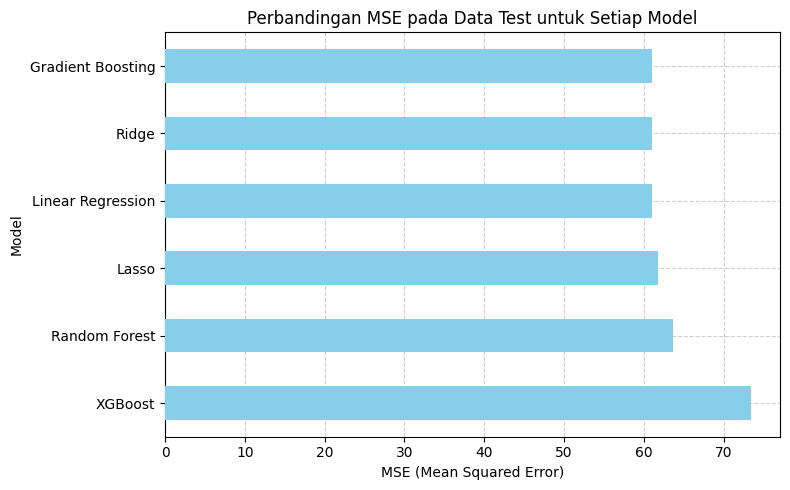

In [ ]:
# Plot horizontal bar chart berdasarkan MSE_test
fig, ax = plt.subplots(figsize=(8, 5))  # Ukuran bisa disesuaikan

# Urutkan berdasarkan nilai MSE test dari tertinggi ke terendah
metrics_df.sort_values(by='MSE_test', ascending=False)['MSE_test'].plot(
    kind='barh',
    ax=ax,
    color='skyblue',
    zorder=3
)

# Tambahkan grid di bawah bar
ax.set_title("Perbandingan MSE pada Data Test untuk Setiap Model")
ax.set_xlabel("MSE (Mean Squared Error)")
ax.set_ylabel("Model")
ax.grid(zorder=0, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

Menampilkan perbandingan RMSE pada data uji untuk setiap model dalam bentuk horizontal bar chart guna memudahkan evaluasi performa model

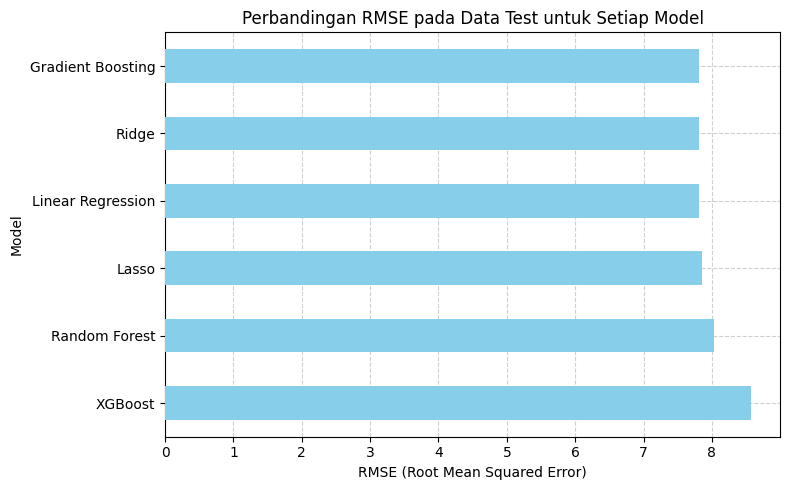

In [ ]:
# Plot horizontal bar chart berdasarkan RMSE_test
fig, ax = plt.subplots(figsize=(8, 5))

# Urutkan berdasarkan nilai RMSE test dari tertinggi ke terendah
metrics_df.sort_values(by='RMSE_test', ascending=False)['RMSE_test'].plot(
    kind='barh',
    ax=ax,
    color='skyblue',
    zorder=3
)

# Tambahkan grid di bawah bar
ax.set_title("Perbandingan RMSE pada Data Test untuk Setiap Model")
ax.set_xlabel("RMSE (Root Mean Squared Error)")
ax.set_ylabel("Model")
ax.grid(zorder=0, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

Melakukan prediksi pada satu sampel data uji menggunakan semua model, lalu menyimpan dan menampilkan hasil prediksi beserta nilai sebenarnya untuk perbandingan

In [ ]:
# Ambil satu sampel dari data uji untuk prediksi
prediksi = x_test.iloc[:1].copy()

# Buat dictionary awal untuk menyimpan hasil prediksi
pred_dict = {'y_true': y_test.iloc[:1].values[0]}  # Ambil nilai y_test yang sesuai

# Loop melalui setiap model dan simpan hasil prediksi ke dalam dictionary
for name, model in model_dict.items():
    prediksi_model = model.predict(prediksi)[0]  # Prediksi satu nilai
    pred_dict[f'prediksi_{name}'] = round(prediksi_model, 2)  # Simpan dengan pembulatan 2 desimal

# Tampilkan hasil prediksi dalam bentuk DataFrame
pd.DataFrame([pred_dict])

,y_true,prediksi_Random Forest,prediksi_Gradient Boosting,prediksi_Linear Regression,prediksi_Ridge,prediksi_Lasso,prediksi_XGBoost
0,84.778571,77.43,76.52,74.9,74.9,74.62,79.480003
